In [32]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
#Importing train Dataset
train_data=pd.read_excel("/content/Data_Train.xlsx")

In [34]:
pd.set_option('display.max_columns',None)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [35]:
train_data.shape

(10683, 11)

In [36]:
train_data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [37]:
#For Cleaning data if values like nan,inf,-inf present
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

## **EDA**


###Lest take columns one by one

For 'date_of_Journey' column we need to convert it form object type to timestamps so that it can be used for prediction with to_datetime function

---



---


'.dt.day' only extract date and 
'.dt.month' only extract month


---








In [38]:
train_data["Journey_day"]=pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_month"]=pd.to_datetime(train_data["Date_of_Journey"], format="%d/%m/%Y").dt.month


In [39]:
#Days and Months are taken so need of "Date_of_Journey" column
train_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [40]:
#Departure hours and mins are taken from "Dep_Time" column
train_data["Dep_hour"]=pd.to_datetime(train_data["Dep_Time"]).dt.hour
train_data["Dep_min"]=pd.to_datetime(train_data["Dep_Time"]).dt.minute
train_data.drop('Dep_Time', axis=1,inplace=True)


In [41]:
#Arrival hours and mins are taken from 'Arrival_Time' column
train_data["Arrival_hour"]=pd.to_datetime(train_data["Arrival_Time"]).dt.hour
train_data["Arrival_min"]=pd.to_datetime(train_data["Arrival_Time"]).dt.minute
train_data.drop('Arrival_Time', axis=1,inplace=True)

In [42]:
#for "Duration" column we need to convert it in hours and mins
duration=list(train_data["Duration"])
durationhr=[]
durationmin=[]

for time in duration:
  if(len(time.split()) !=2):
    if("h" in time):
      time= time + " 0m"
    else:
      time= "0h " + time
  durationhr.append(int(time.split(sep="h")[0]))
  durationmin.append(int(time.split(sep="m")[0].split(" ")[-1]))

train_data["Duration_hour"]=pd.DataFrame(durationhr);
train_data["Duration_min"]=pd.DataFrame(durationmin);

#Now no need of "Duration" column
train_data.drop("Duration", axis=1,inplace=True)


## **Encoding Categorical Variables**

---

Nominal data: There is no ordering in data, OneHotEncoding is used.

---



---


Ordinal data:There is ordering in data, Label encoding is used.

In [43]:
#Airline
#There is no Ordering in data ie no one is more or less than other so
#One Hot Encoding

train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

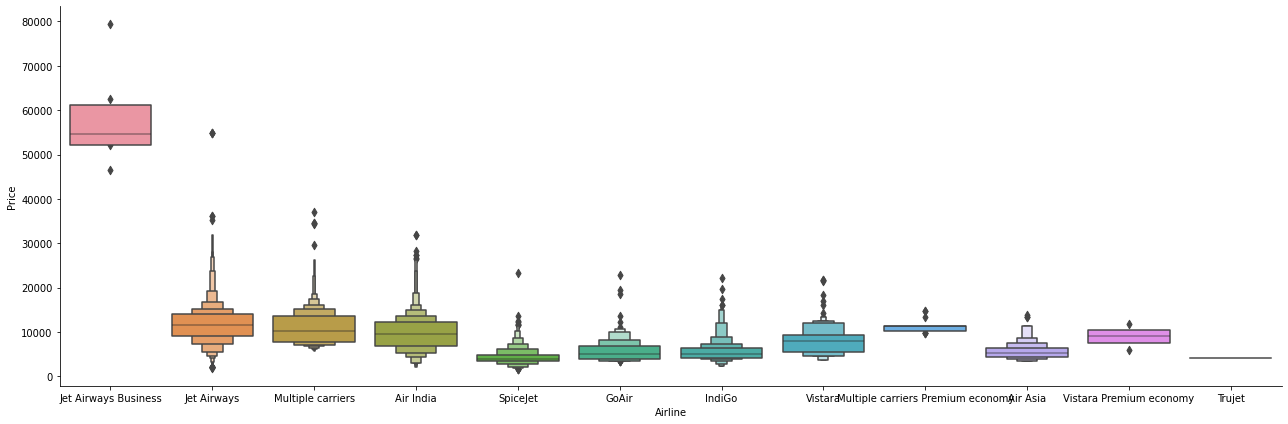

In [44]:
#from the figure we can see "jet Airways" have price median much more than others.
#Others have almost same median.
#If there is a trend we will use LabelEncoding 
sns.catplot(y="Price",x="Airline", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [45]:
#Airline OneHotEncoding
Airline=pd.get_dummies(train_data["Airline"], drop_first=True)
Airline

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [46]:
#Source
#There is no Ordering in data ie no one is more or less than other so
#One Hot Encoding
train_data["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

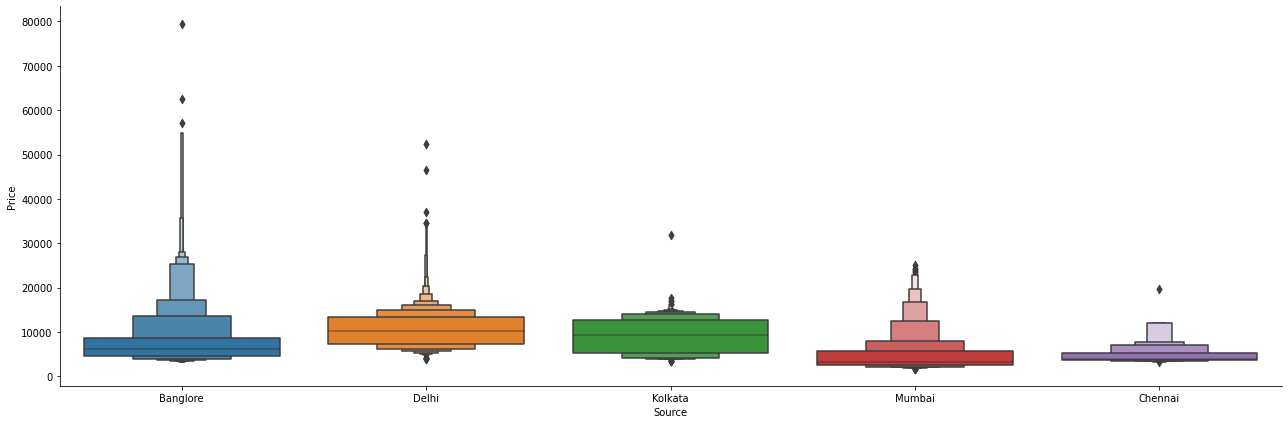

In [47]:
#All have almost same median.
#If there is a trend we will use LabelEncoding 
sns.catplot(y="Price",x="Source", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [48]:
#Source OneHotEncoding
Source=pd.get_dummies(train_data["Source"], drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [49]:
#Destination
#There is no Ordering in data ie no one is more or less than other so
#One Hot Encoding
train_data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

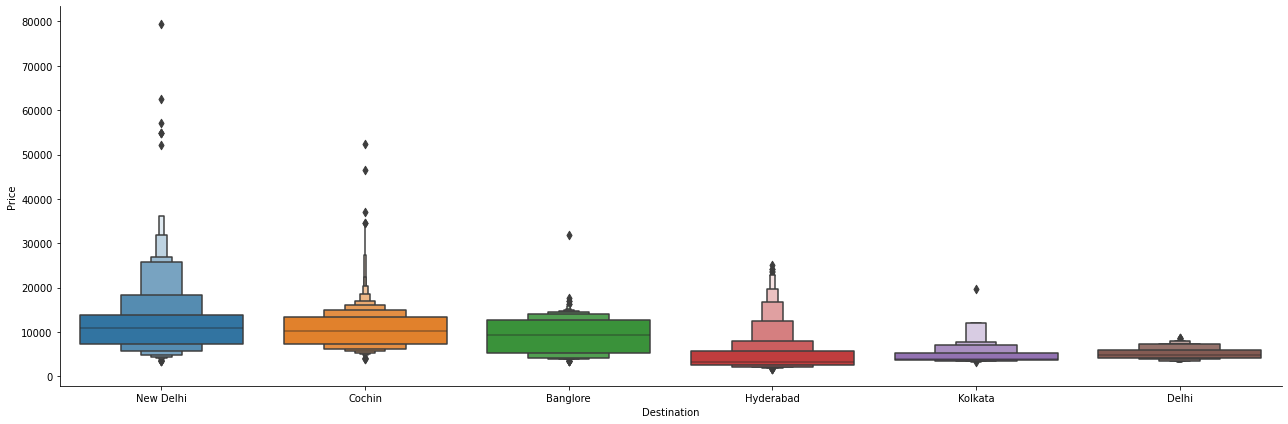

In [50]:
#All have almost same median.
#If there is a trend we will use LabelEncoding 
sns.catplot(y="Price",x="Destination", data=train_data.sort_values("Price",ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

In [51]:
#Destination OneHotEncoding
Destination=pd.get_dummies(train_data["Destination"], drop_first=True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [52]:
#joining dummies of "Destination", "Source", "Airline" with train_data.
train_data=pd.concat([train_data,Destination, Source,Airline],axis=1)

# Removing "Airline", "Source", "Destination" columns.
train_data.drop(["Airline", "Source", "Destination"],axis=1,inplace=True)

"Additional_Info" column conatin almost 80% 'no_info' so we can remove it

---
"Route" and "Total_Stops" are very related to each other so we can remove one of them.



In [53]:
train_data.drop(["Additional_Info","Route"],axis=1,inplace=True)

In [54]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [55]:
#"Total_stops" is Ordinal Data because lesser the stops lower the price will be and vice versa
#Label ENCODING 

train_data.replace({"1 stop": 1,"non-stop": 0,"2 stops": 2,"3 stops": 3,"4 stops": 4}, inplace=True)

In [56]:
#Cleaning train_data
train_data=clean_dataset(train_data)

## **Test Data**

In [57]:
#To avoid data leakage we will do preprocessing of test data separetly.

test_data=pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
#Preprocessing

test_data["Journey_day"]=pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.day
test_data["Journey_month"]=pd.to_datetime(test_data["Date_of_Journey"], format="%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"],axis=1,inplace=True)

#Departure hours and mins are taken
test_data["Dep_hour"]=pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"]=pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop('Dep_Time', axis=1,inplace=True)

#Arrival hours and mins are taken
test_data["Arrival_hour"]=pd.to_datetime(test_data["Arrival_Time"]).dt.hour
test_data["Arrival_min"]=pd.to_datetime(test_data["Arrival_Time"]).dt.minute
test_data.drop('Arrival_Time', axis=1,inplace=True)

#for Duration column we need to convert it in hours and mins
duration=list(test_data["Duration"])
durationhr=[]
durationmin=[]

for time in duration:
  if(len(time.split()) !=2):
    if("h" in time):
      time= time + " 0m"
    else:
      time= "0h " + time
  durationhr.append(int(time.split(sep="h")[0]))
  durationmin.append(int(time.split(sep="m")[0].split(" ")[-1]))
test_data["Duration_hour"]=pd.DataFrame(durationhr);
test_data["Duration_min"]=pd.DataFrame(durationmin);
test_data.drop("Duration", axis=1,inplace=True)

# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)

test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
print()
print()

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64




In [59]:
#cleaning test_data
test_data=clean_dataset(test_data)


## **Feature Selection**

---
Three best technique to select best festures that are more correlated with Price

---
1.   Heatmap
2.   feature_importance
3.   selectKBest







In [60]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy'],
      dtype='object')

In [91]:
#All independent variables
X=train_data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Chennai', 'Delhi', 'Kolkata', 'Mumbai', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy']]

#Dependent variable "Price" column       
y=train_data.iloc[:,1]
X.shape
y.shape


(10682,)

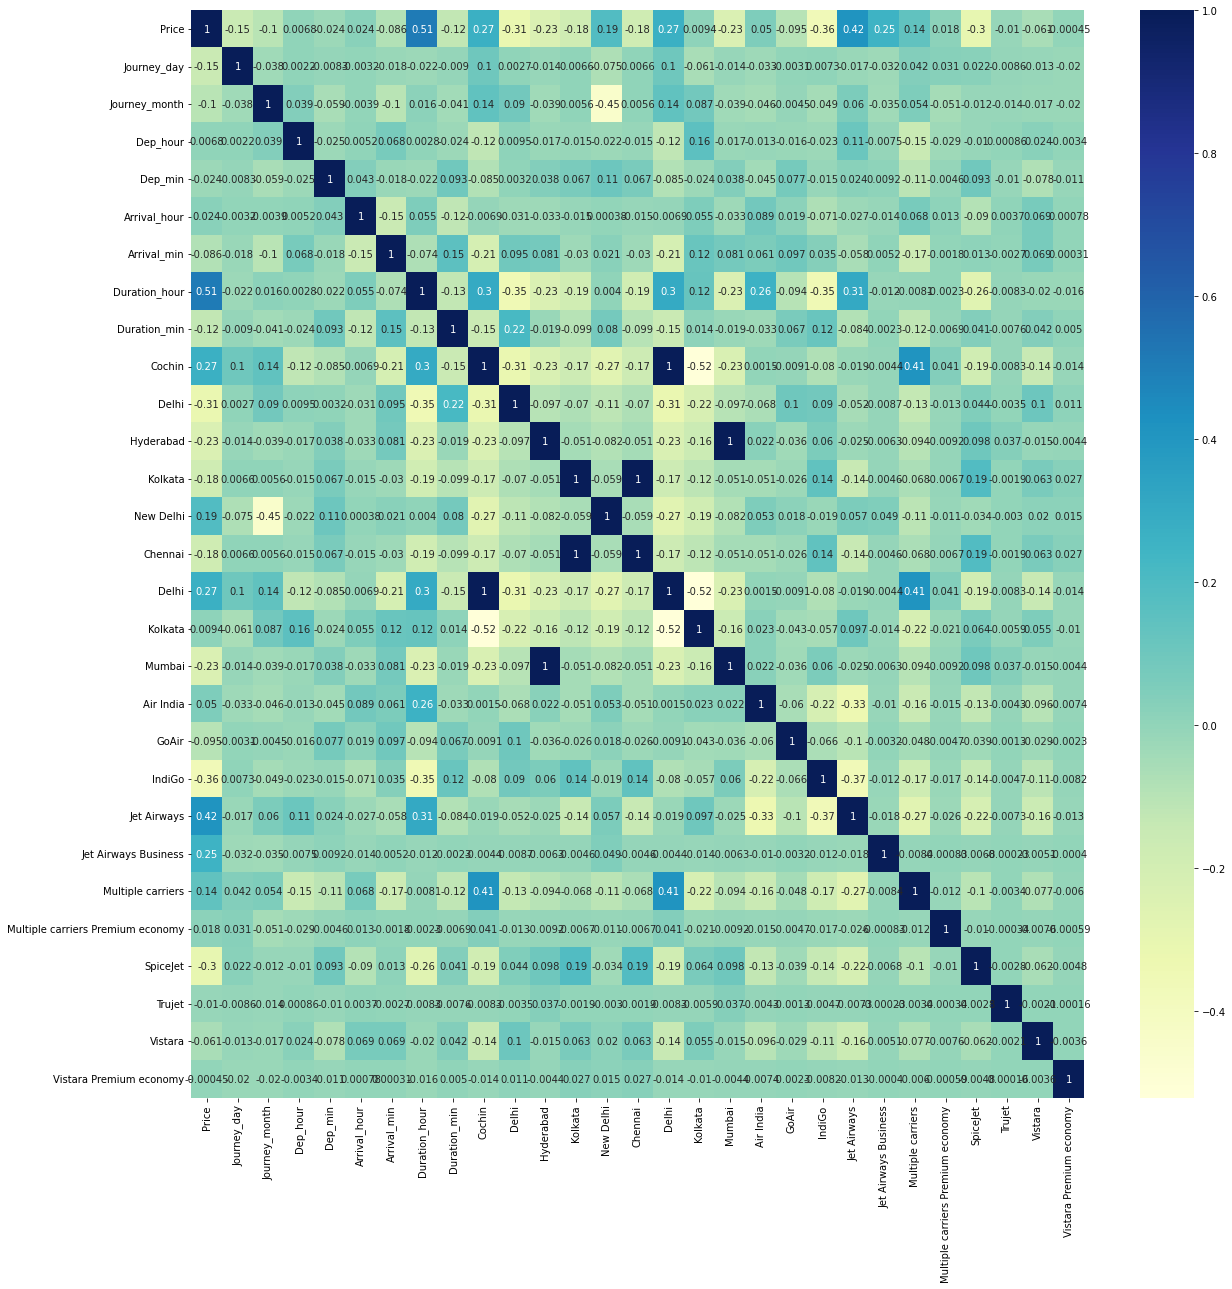

In [62]:
#to see corretion between different variables/features
from matplotlib import figure
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [63]:
#Selecting Important features using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

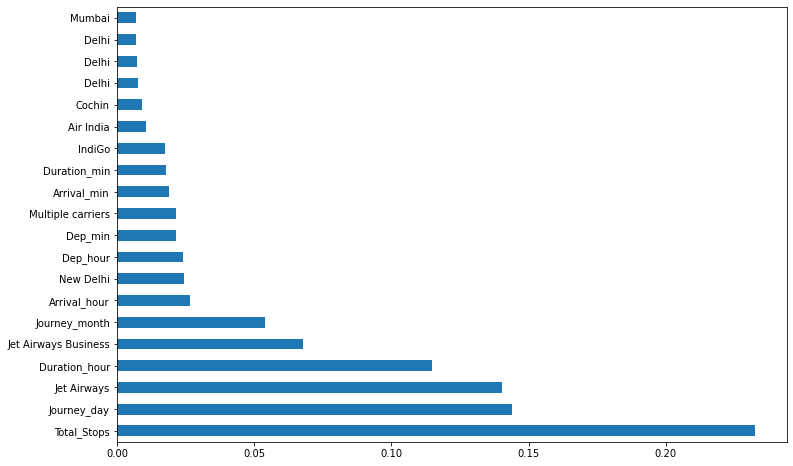

In [64]:
#Graph for better Visualization
plt.figure(figsize=(12,8))
feature_importance=pd.Series(selection.feature_importances_, index=X.columns)
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

# **Fitting model using Random Forest**

---



1.   Split dataset into train and test set in order to prediction w.r.t X_test.
2.   If needed do scaling of data but Scaling is not done in Random forestImport model.
3.   Fit the data and then Predict w.r.t X_test.
4.   In regression check RSME ScorePlot graph.


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
#Prediction of test_set
y_pred = reg_rf.predict(X_test)

**without Hyperparameter tunning**

In [67]:
#Accuracy With train_data
reg_rf.score(X_train, y_train)

0.9536877198582248

In [68]:
#Accuracy With test_data

reg_rf.score(X_test, y_test)

0.8002337952107978

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


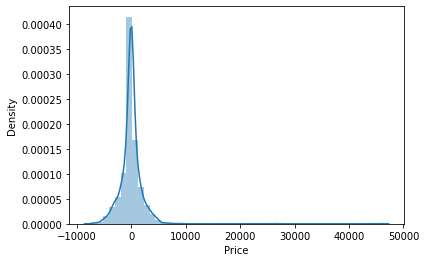

In [69]:
#Next two graph will show difference in actual value and predicted value of "Price"
sns.distplot(y_test-y_pred)
plt.show()

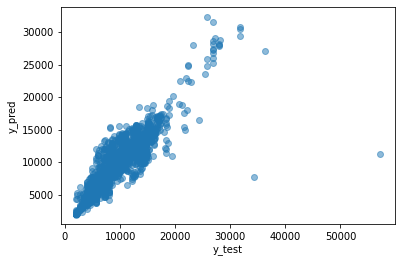

In [70]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [71]:
#Evaluation of Model without Hyperparameter tunning
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1167.1891251081238
MSE: 4307370.1593288155
RMSE: 2075.4204777174227


In [72]:
metrics.r2_score(y_test, y_pred)

0.8002337952107978

#**Hyperparameter Tuning**

---


Choose following method for hyperparameter tuning

*   RandomizedSearchCV --> Fast than GridSearchCV
*   Assign hyperparameters in form of dictionery





Fit the model and
Check best paramters and best score

In [73]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [75]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rf_random.best_params_

prediction = rf_random.predict(X_test)


**After Hyperparameter tunning**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


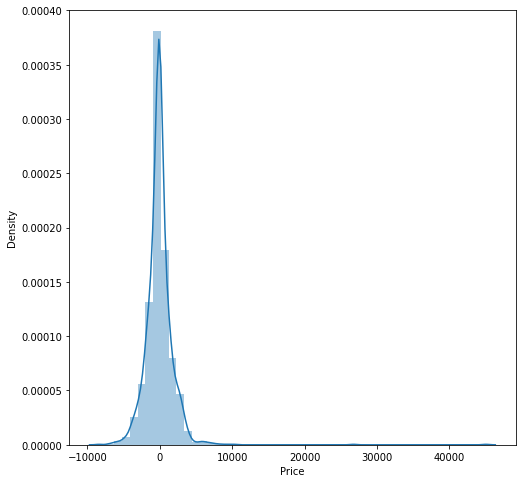

In [77]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

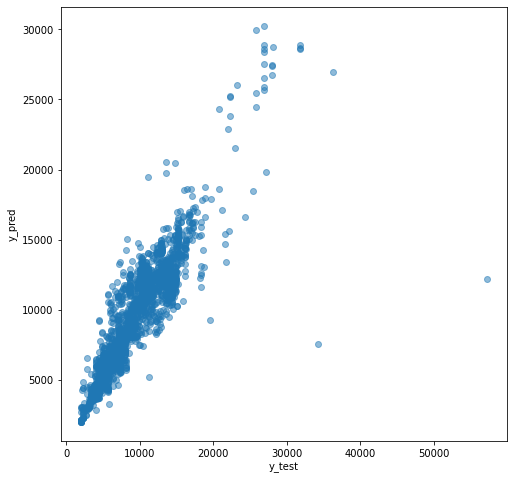

In [78]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [79]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1166.267453091948
MSE: 4049887.385977947
RMSE: 2012.4332003765858


In [80]:
# Here We can see Accuracy of our Classifier increases with Hyperparameter tunning
y=rf_random.predict(X_test)
metrics.r2_score(y_test, y)

0.8121752709902827

In [98]:
#Prediction on a new case
#Consider a situation Fare prediction for Airline flight from Delhi to Chennai with zero stops
''' [ 'Total_Stops'=0, 'Journey_day'=15, 'Journey_month'=8, 'Dep_hour'=10,
       'Dep_min'=00, 'Arrival_hour'=12, 'Arrival_min'=30, 'Duration_hour'=2,
       'Duration_min'=30, 'Cochin'=0, 'Delhi'=1, 'Hyderabad'=0, 'Kolkata'=0, 'New Delhi'=0,
       'Chennai'=1, 'Delhi'=0, 'Kolkata'=0, 'Mumbai'=0, 'Air India'=1, 'GoAir'=0, 'IndiGo'=0,
       'Jet Airways'=0, 'Jet Airways Business'=0, 'Multiple carriers'=0,
       'Multiple carriers Premium economy'=0, 'SpiceJet'=0, 'Vistara'=0,
       'Vistara Premium economy'=0] '''
rf_random.predict([[0,15,8,10,0,12,30,2,30,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0, 0, 0, 0]])       

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([4666.05755283])

In [ ]:
#Predicted Price is Approx. Rs.4666